In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from dmrgwaytorho import *
import qutip as q
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
import pickle 
import os
from IPython.display import Audio
from permutations import get_dicts, rho_3

In [2]:
sound_file=os.path.basename("C:Users/alfre/Ergotropy/logbook_and_notebooks/Exclamation.wav")

In [3]:
sX = np.array([[0, 1], [1, 0]], dtype='d') 
Id = np.array([[1, 0], [0, 1]], dtype='d')
h=0.00
rho_dict={}
def H2(Sx1, Sx2):  # two-site part of H
    
    return -0.5*(kron(Sx1, Sx2.conjugate().transpose()))

Audio(filename=sound_file,autoplay=True)

In [4]:
lambdarange=np.linspace(0.1,2,100)
rho_dict_scal={}
for lam in lambdarange:

    H1 = -0.5*lam*np.array([[1, 0], [0, -1]], dtype='d')-h*np.array([[0, 1], [1, 0]], dtype='d') # single-site portion of H 

    site = Block(length=1, basis_size=model_d, operator_dict={
        "H": H1,
        "conn_Sx": sX,
        })

    rho_dict_scal[lam]=infinite_system_algorithm(site,site, 30, 20,H2)

    print(lam)


0.1
0.1191919191919192
0.1383838383838384
0.1575757575757576
0.17676767676767677
0.19595959595959594
0.21515151515151515
0.23434343434343433
0.2535353535353535
0.2727272727272727
0.2919191919191919
0.3111111111111111
0.3303030303030303
0.3494949494949495
0.3686868686868686
0.3878787878787878
0.407070707070707
0.42626262626262623
0.44545454545454544
0.46464646464646464
0.48383838383838385
0.503030303030303
0.5222222222222221
0.5414141414141413
0.5606060606060606
0.5797979797979798
0.598989898989899
0.6181818181818182
0.6373737373737373
0.6565656565656565
0.6757575757575757
0.6949494949494949
0.7141414141414141
0.7333333333333333
0.7525252525252525
0.7717171717171717
0.7909090909090909
0.81010101010101
0.8292929292929292
0.8484848484848484
0.8676767676767676
0.8868686868686868
0.906060606060606
0.9252525252525252
0.9444444444444443
0.9636363636363635
0.9828282828282827
1.002020202020202
1.0212121212121212
1.0404040404040404
1.0595959595959596
1.0787878787878789
1.097979797979798
1.117171

In [5]:
rho_effective={}
for el in lambdarange:
    if el<1:
        rho_effective[el]=0.5*rho_dict_scal[el][0]+0.5*rho_dict_scal[el][1]
    else:
        rho_effective[el]=rho_dict_scal[el][0]
rho_spectra={}
for el in lambdarange:
    rho_spectra[el]=np.sort(eigvalsh(rho_effective[el]))

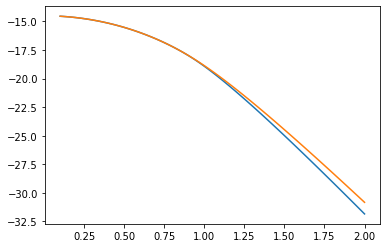

In [6]:
ener0=np.zeros_like(lambdarange)
ener1=np.zeros_like(lambdarange)
for x in lambdarange:
    ener0[np.where(lambdarange==x)]=rho_dict_scal[x][4]
    ener1[np.where(lambdarange==x)]=rho_dict_scal[x][5]
plt.plot(lambdarange,ener0)
plt.plot(lambdarange,ener1)

In [7]:
def gzero(phi,lamb):
    return (1/(2*np.pi))*(lamb-np.cos(phi))/np.sqrt(1+lamb**2-2*lamb*np.cos(phi))
def guno(phi,lamb):
    return (1/(2*np.pi))*(lamb*np.cos(phi)-np.cos(2*phi))/np.sqrt(1+lamb**2-2*lamb*np.cos(phi))  
def gmenouno(phi,lamb):
    return (1/(2*np.pi))*(lamb*np.cos(phi)-1)/np.sqrt(1+lamb**2-2*lamb*np.cos(phi))

def sigma(n):
    if n==0:
        return q.identity(2)
    if n==1:
        return q.sigmax()
    if n==2:
        return q.sigmay()
    if n==3:
        return q.sigmaz()
    
def gzerok(N,lamb):
    g=0.0
    for k in np.arange(N/2+1):
        g+=(lamb-np.cos(2*np.pi*k/N))/np.sqrt(1+lamb**2-2*lamb*np.cos(2*np.pi*k/N))
    return 2*g/N
def gunok(N,lamb):
    g=0.0
    for k in np.arange(N/2+1):
        g+=(lamb*np.cos(2*np.pi*k/N)-np.cos(2*2*np.pi*k/N))/np.sqrt(1+lamb**2-2*lamb*np.cos(2*np.pi*k/N))
    return 2*g/N
def gmenounok(N,lamb):
    g=0.0
    for k in np.arange(N/2+1):
        g+=(lamb*np.cos(2*np.pi*k/N)-1)/np.sqrt(1+lamb**2-2*lamb*np.cos(2*np.pi*k/N))
    return 2*g/N                               
def rho_2(x):
    return (1/4)*(q.tensor(sigma(0),sigma(0))-im1vec[x]*q.tensor(sigma(1),sigma(1))-i1vec[x]*q.tensor(sigma(2),sigma(2))+ \
                  (i0vec[x]**2-i1vec[x]*im1vec[x])*q.tensor(sigma(3),sigma(3))+i0vec[x]*(q.tensor(sigma(0),sigma(3))+q.tensor(sigma(3),sigma(0))))


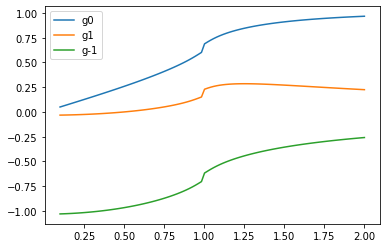

In [8]:
N=60
    
i0vec=np.zeros_like(lambdarange)
i1vec=np.zeros_like(lambdarange)
im1vec=np.zeros_like(lambdarange)
i=0
for lam in lambdarange:
    i0vec[i]=gzerok(N,lam)
    i1vec[i]=gunok(N,lam)
    im1vec[i]=gmenounok(N,lam)
    i+=1
plt.plot(lambdarange,i0vec,label="g0")
plt.plot(lambdarange,i1vec,label="g1")
plt.plot(lambdarange,im1vec,label="g-1")
plt.legend()
plt.show()    

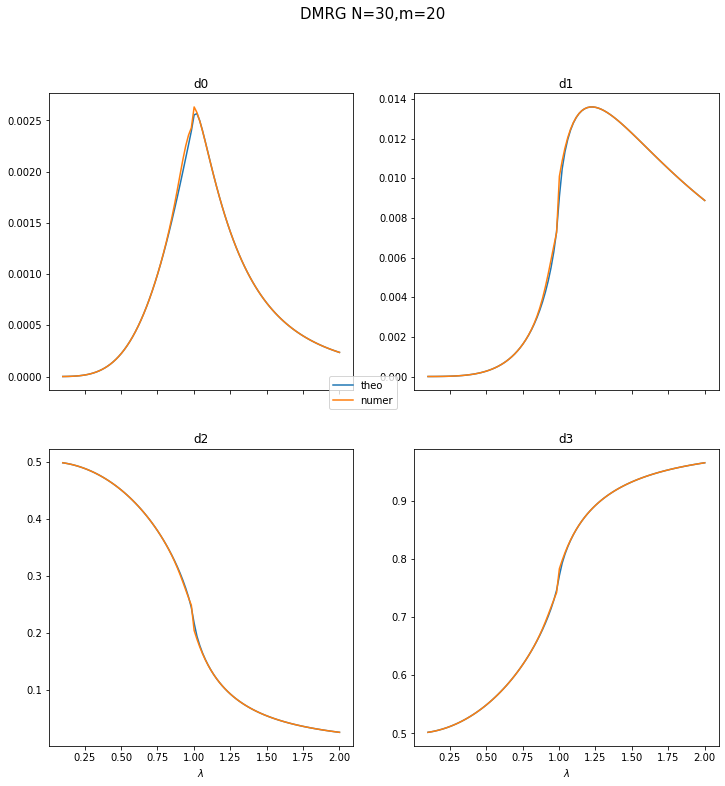

In [9]:
i0vec=np.zeros_like(lambdarange)
i1vec=np.zeros_like(lambdarange)
im1vec=np.zeros_like(lambdarange)
i=0
for lam in lambdarange:
    I_0=integrate.quad(gzero,0,2*np.pi,args=(lam))
    I_1=integrate.quad(guno,0,2*np.pi,args=(lam))
    I_m1=integrate.quad(gmenouno,0,2*np.pi,args=(lam))
    i0vec[i]=I_0[0]
    i1vec[i]=I_1[0]
    im1vec[i]=I_m1[0]
    i+=1


fig, axs = plt.subplots(2, 2,sharex=True,figsize=[12,12])

for k in range(4):
    kb=format(k,"02b")
    kbvec=[int(x) for x in str(kb)]
    specvec= np.zeros_like(lambdarange)
    i=0
    for el in lambdarange:
        specvec[i]=rho_spectra[el][k]
        i+=1
    specvec1= np.zeros_like(lambdarange)
    
    theovec=np.zeros_like(lambdarange)
    for el in np.arange(len(lambdarange)):
        theovec[el]=rho_2(el).eigenenergies()[k]

    axs[kbvec[0], kbvec[1]].plot(lambdarange,theovec,label="theo")
    axs[kbvec[0], kbvec[1]].plot(lambdarange,specvec,label="numer")

    axs[kbvec[0], kbvec[1]].set_title('d'+str(k))
handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center')
fig.suptitle(r"DMRG N=30,m=20",fontsize=15)
axs[1,1].set_xlabel(r"$\lambda$")
axs[1,0].set_xlabel(r"$\lambda$")
plt.savefig("dmrg3020")
plt.show()    

In [10]:
sX = np.array([[0, 1], [1, 0]], dtype='d') 
Id = np.array([[1, 0], [0, 1]], dtype='d')
h=0.00
rho_dict={}
def H2(Sx1, Sx2):  # two-site part of H
    
    return -0.5*(kron(Sx1, Sx2.conjugate().transpose()))

In [11]:
lambdarange=np.linspace(0.1,2,100)
rho_dict_scal={}
for lam in lambdarange:

    H1 = -0.5*lam*np.array([[1, 0], [0, -1]], dtype='d')-h*np.array([[0, 1], [1, 0]], dtype='d') # single-site portion of H 

    site = Block(length=1, basis_size=model_d, operator_dict={
        "H": H1,
        "conn_Sx": sX,
        })

    rho_dict_scal[lam]=infinite_system_algorithm(site,site, 60, 20,H2)

    print(lam)

0.1
0.1191919191919192
0.1383838383838384
0.1575757575757576
0.17676767676767677
0.19595959595959594
0.21515151515151515
0.23434343434343433
0.2535353535353535
0.2727272727272727
0.2919191919191919
0.3111111111111111
0.3303030303030303
0.3494949494949495
0.3686868686868686
0.3878787878787878
0.407070707070707
0.42626262626262623
0.44545454545454544
0.46464646464646464
0.48383838383838385
0.503030303030303
0.5222222222222221
0.5414141414141413
0.5606060606060606
0.5797979797979798
0.598989898989899
0.6181818181818182
0.6373737373737373
0.6565656565656565
0.6757575757575757
0.6949494949494949
0.7141414141414141
0.7333333333333333
0.7525252525252525
0.7717171717171717
0.7909090909090909
0.81010101010101
0.8292929292929292
0.8484848484848484
0.8676767676767676
0.8868686868686868
0.906060606060606
0.9252525252525252
0.9444444444444443
0.9636363636363635
0.9828282828282827
1.002020202020202
1.0212121212121212
1.0404040404040404
1.0595959595959596
1.0787878787878789
1.097979797979798
1.117171

In [102]:
rho_effective={}
for el in lambdarange:
    if el<1:
        rho_effective[el]=0.5*rho_dict_scal[el][0]+0.5*rho_dict_scal[el][1]
    else:
        rho_effective[el]=rho_dict_scal[el][0]
rho_spectra={}
for el in lambdarange:
    rho_spectra[el]=np.sort(eigvalsh(rho_effective[el]))

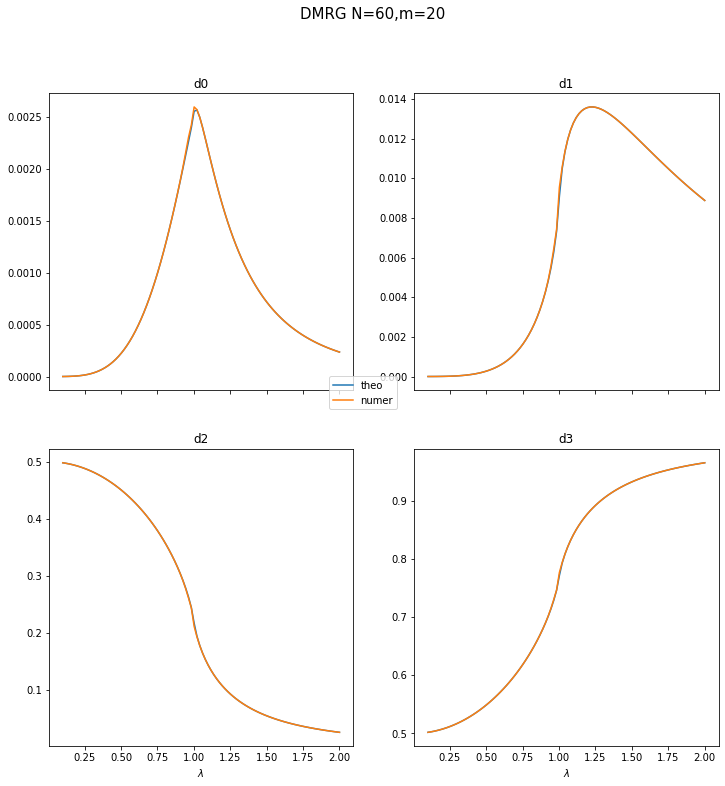

In [103]:
fig, axs = plt.subplots(2, 2,sharex=True,figsize=[12,12])

for k in range(4):
    kb=format(k,"02b")
    kbvec=[int(x) for x in str(kb)]
    specvec= np.zeros_like(lambdarange)
    i=0
    for el in lambdarange:
        specvec[i]=rho_spectra[el][k]
        i+=1
    specvec1= np.zeros_like(lambdarange)
    
    theovec=np.zeros_like(lambdarange)
    for el in np.arange(len(lambdarange)):
        theovec[el]=rho_2(el).eigenenergies()[k]

    axs[kbvec[0], kbvec[1]].plot(lambdarange,theovec,label="theo")
    axs[kbvec[0], kbvec[1]].plot(lambdarange,specvec,label="numer")

    axs[kbvec[0], kbvec[1]].set_title('d'+str(k))
handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center')
fig.suptitle(r"DMRG N=60,m=20",fontsize=15)
axs[1,1].set_xlabel(r"$\lambda$")
axs[1,0].set_xlabel(r"$\lambda$")
plt.savefig("dmrg6020")
plt.show()    

In [162]:
%load_ext autoreload
%autoreload
lambdarange=np.linspace(0.1,2,100)
from permutations import get_dicts,g_s,rho_3new,rho_2new

dic,perm=get_dicts()

g=g_s(lambdarange)

rho_dic={}
for l in lambdarange:
    rho_dic[l]=rho_2new(dic,perm,g,l)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
0.9999999999999998


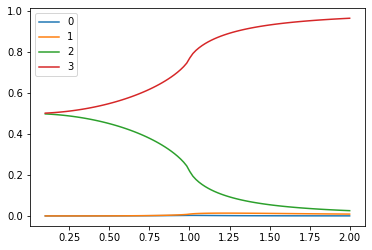

In [163]:
check=0
def check_herm(a, tol=1e-6):
    return np.all(np.abs(a-a.conjugate().transpose()) < tol)
print(check_herm(np.array([[0,-1j],[1j,0]])))
print([check_herm(np.array([rho_dic[x]])) for x in rho_dic])
for k in range(4):
        
    theovec=np.zeros_like(lambdarange)
    
    
    for i,el in enumerate(lambdarange):
        theovec[i]=eigvalsh(rho_dic[el])[k]
        
    check=check+theovec[30]
    plt.plot(lambdarange,theovec,label=k)
print(check)
plt.legend()
plt.show()    

In [122]:
print(check)

0.9999999999999998


reload(my.module)


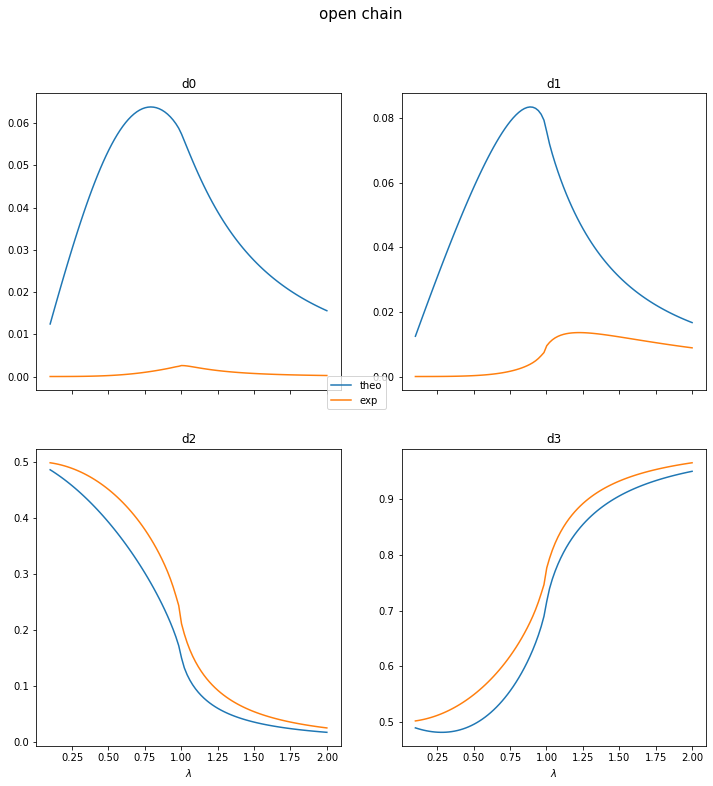

In [157]:

fig, axs = plt.subplots(2, 2,sharex=True,figsize=[12,12])
ind=[(x,y) for x in range(2) for y in range(2)]

for k in range(4):

    specvec= np.zeros_like(lambdarange)
    theovec=np.zeros_like(lambdarange)

    for i,el in enumerate(lambdarange):
        specvec[i]=np.sort(eigvalsh(rho_effective[el]))[k]
        theovec[i]=eigvalsh(rho_dic[el])[k]    

    axs[ind[k]].plot(lambdarange,theovec,label="theo")
    axs[ind[k]].plot(lambdarange,specvec,label="exp")
    axs[ind[k]].set_title('d'+str(k))
handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center')
fig.suptitle(r"open chain",fontsize=15)
axs[1,1].set_xlabel(r"$\lambda$")
axs[1,0].set_xlabel(r"$\lambda$")
plt.show()    